In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv(r"E:\Medical Cost\insurance.csv")

In [5]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)


In [8]:
data.corr()['charges'].sort_values()


region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

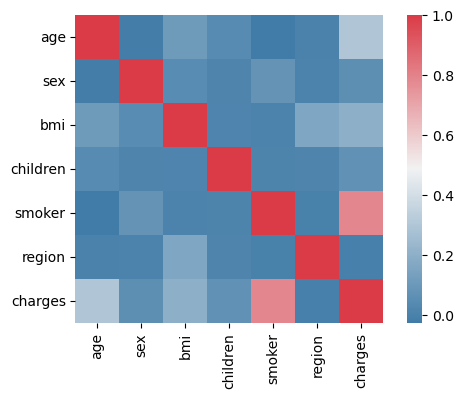

In [9]:
f, ax = pl.subplots(figsize=(6,4))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)


In [10]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot([p], ncols=2, plot_width=400, plot_height=400, toolbar_location=None))


Loading BokehJS ...

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

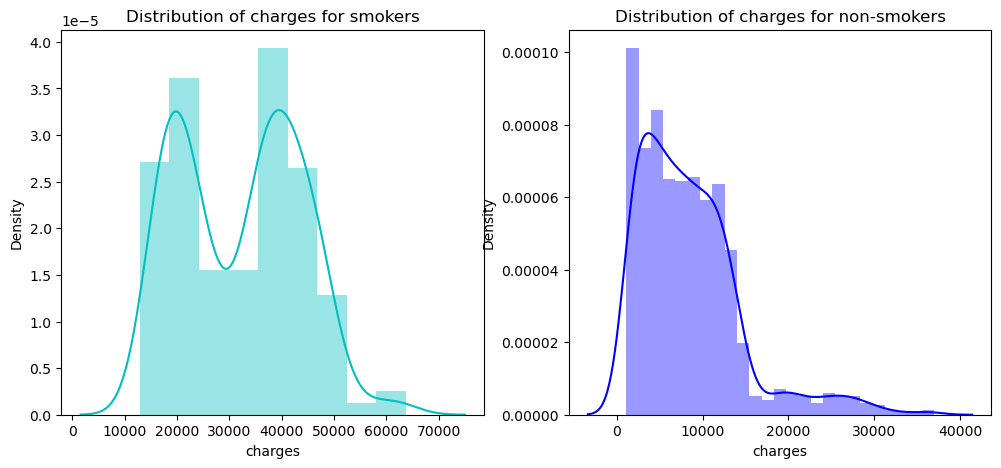

In [11]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')


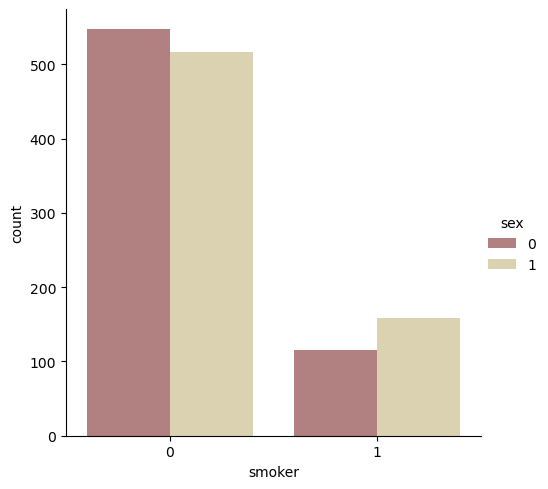

In [12]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)


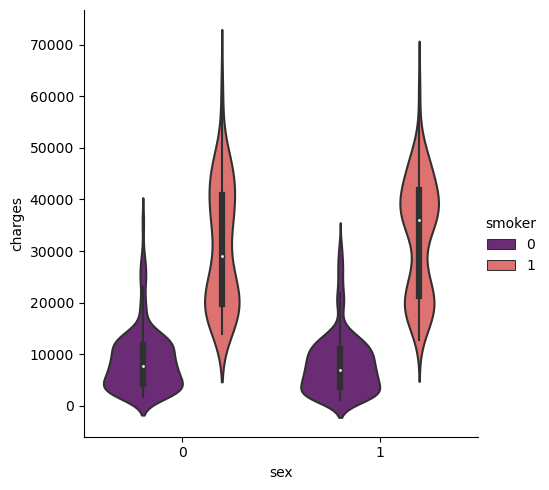

In [13]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')


<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

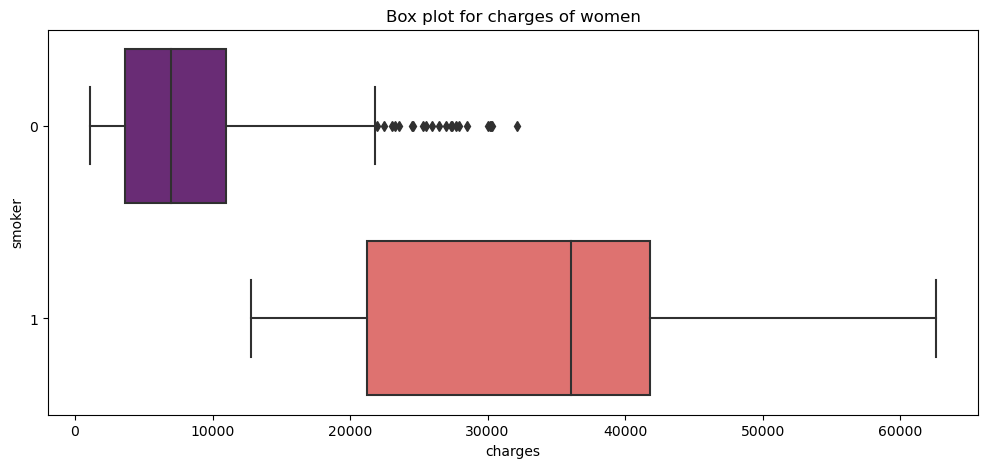

In [14]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')


<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

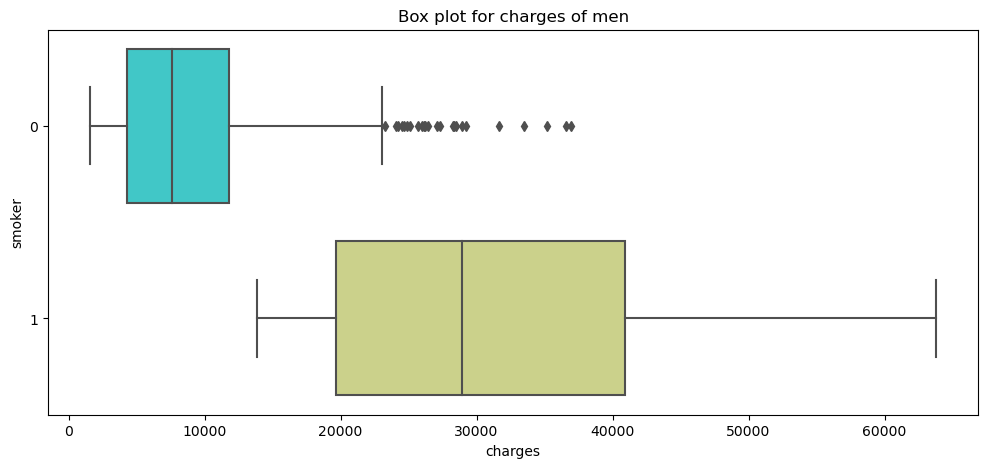

In [15]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')


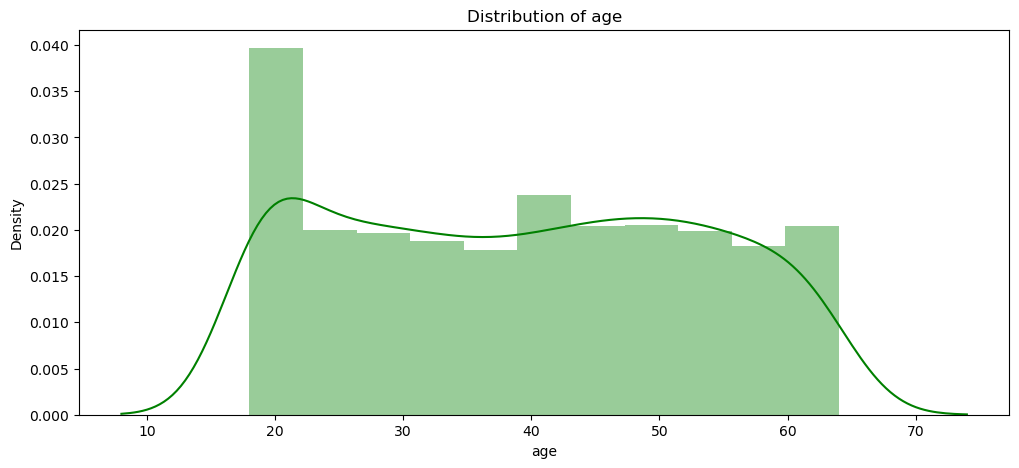

In [16]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')


Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

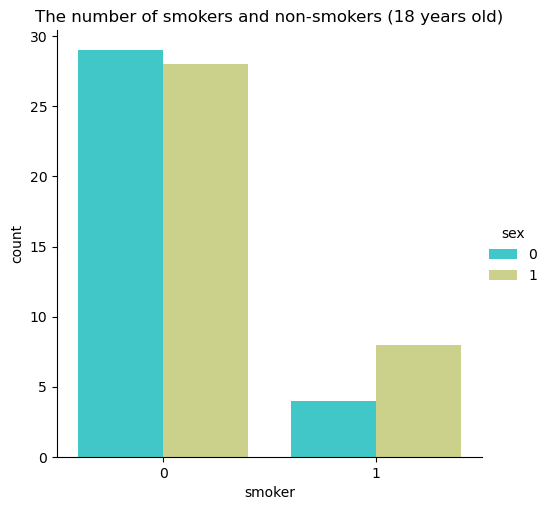

In [17]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")


<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

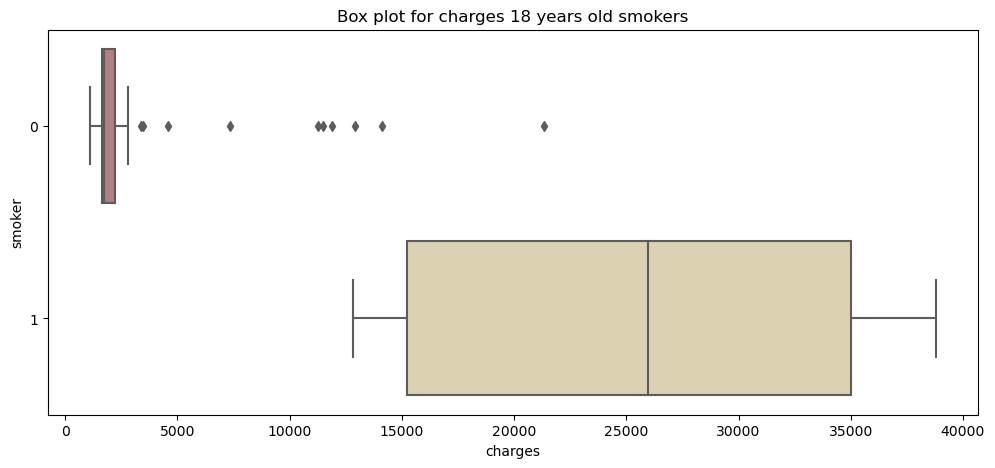

In [18]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')


Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

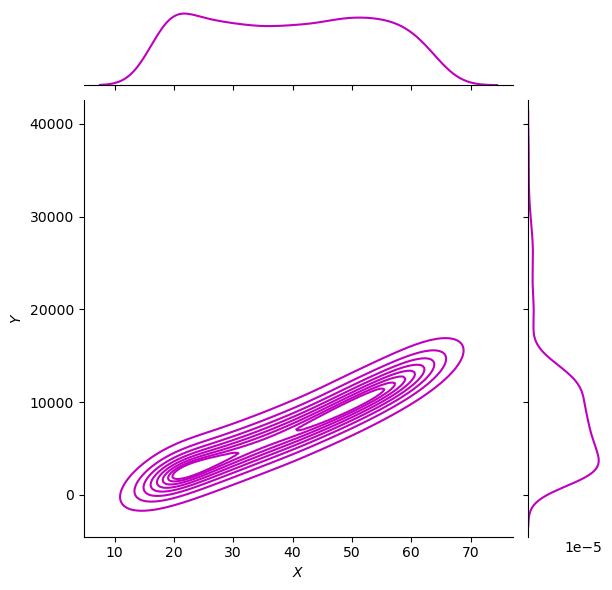

In [19]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')


Text(0.5, 1.0, 'Distribution of charges and age for smokers')

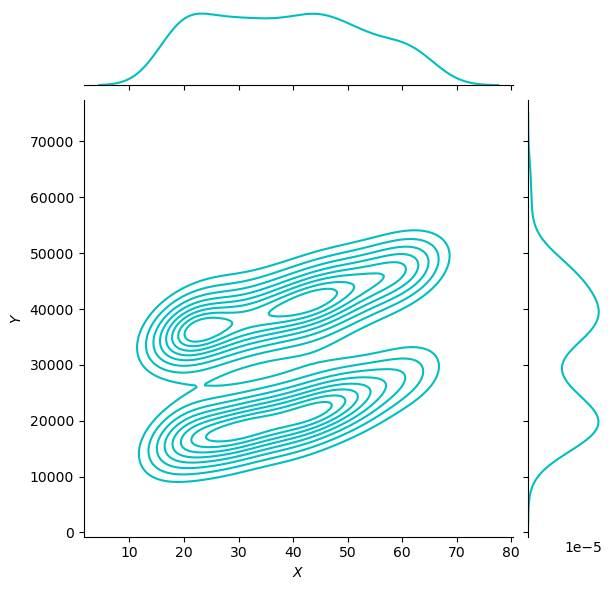

In [20]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')


In [21]:
#non - smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)


In [22]:
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non-smokers')

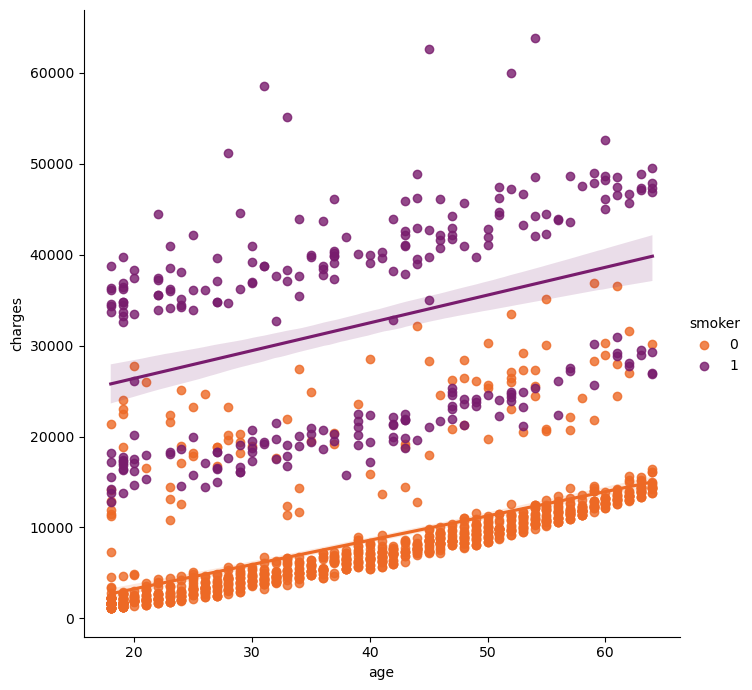

In [23]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette='inferno_r', height=7)
ax.set_title('Smokers and non-smokers')


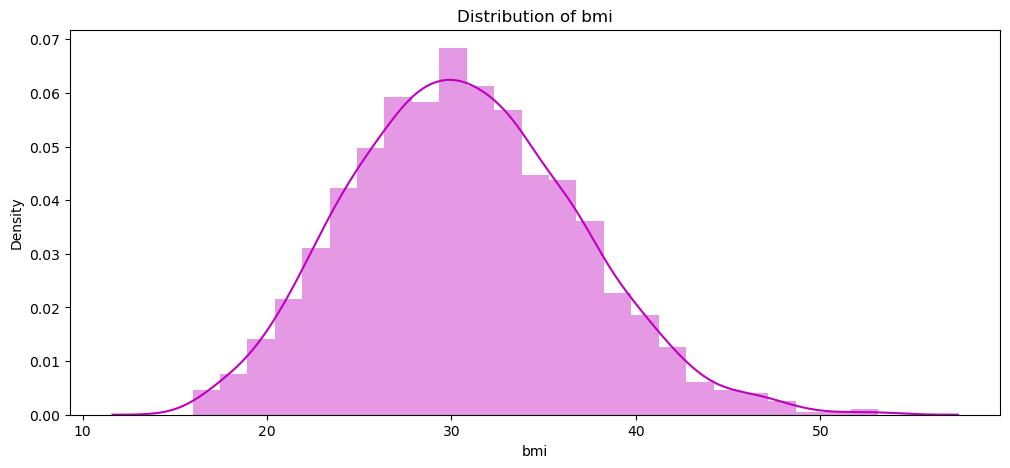

In [24]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')


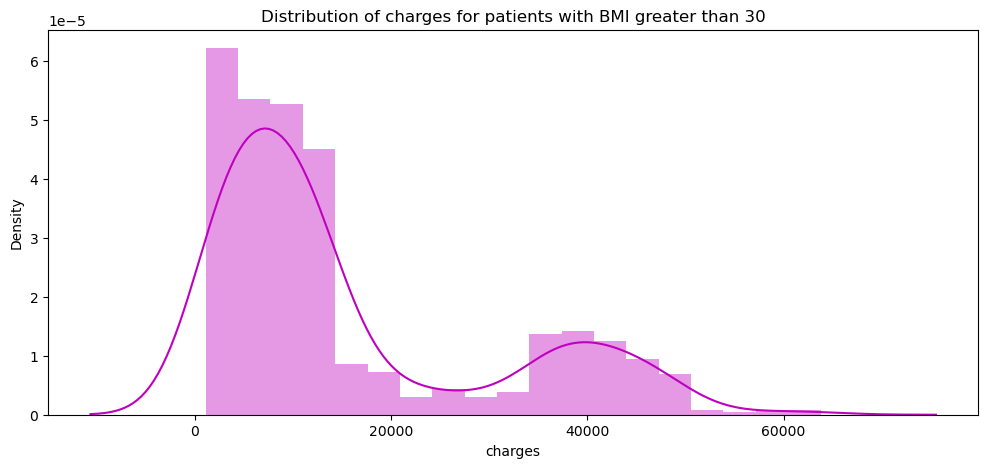

In [25]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')


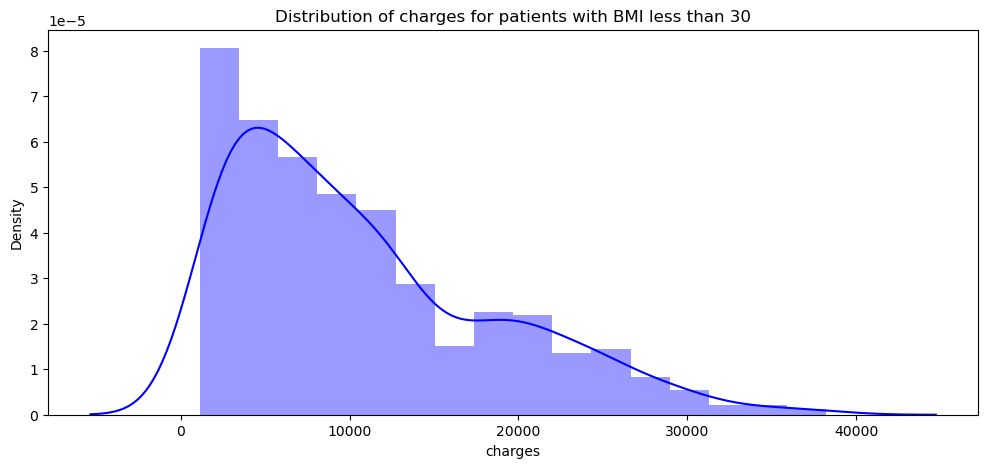

In [26]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')


Text(0.5, 1.0, 'Distribution of bmi and charges')

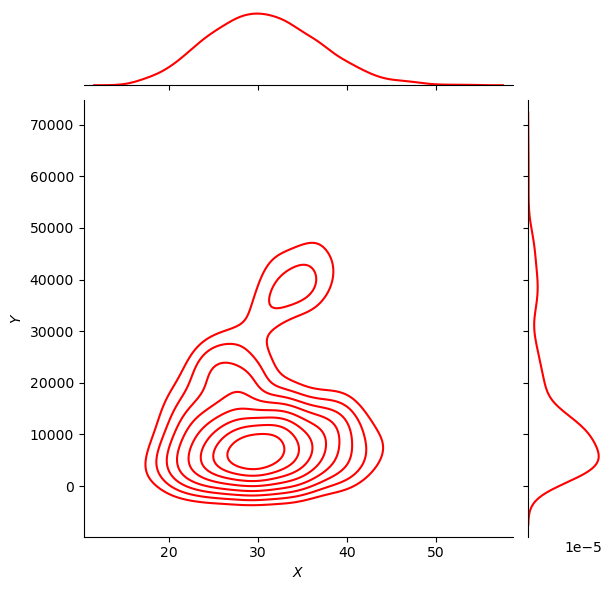

In [27]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')


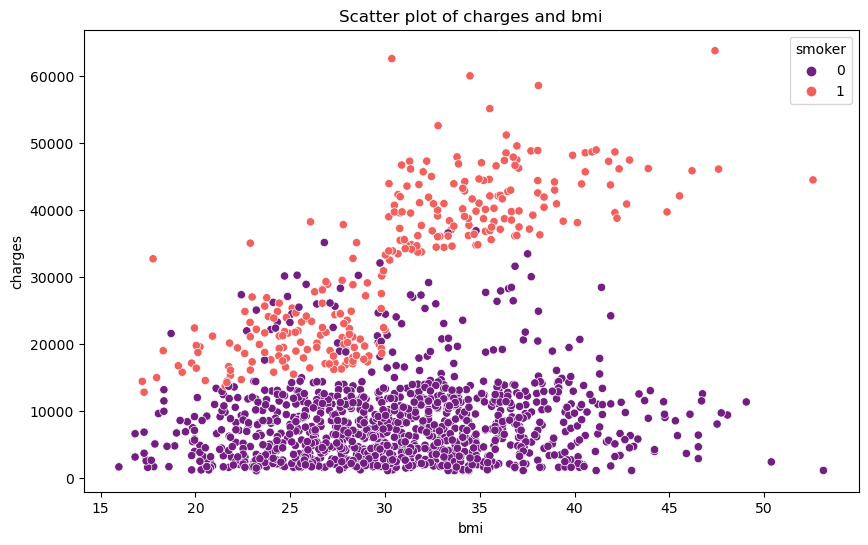

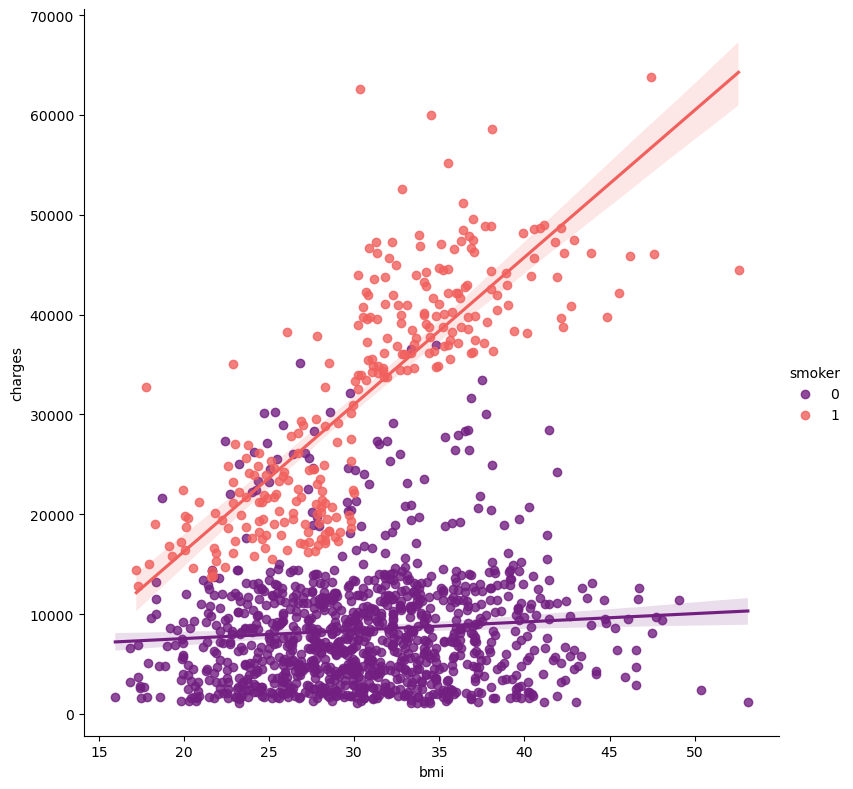

In [28]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette='magma', height=8)


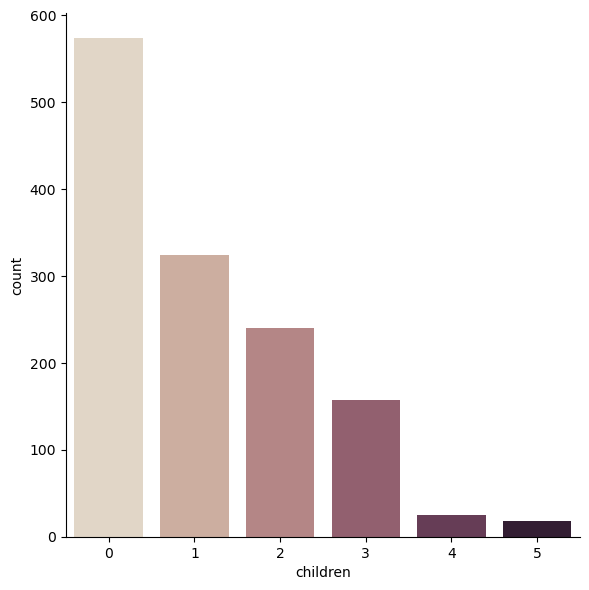

In [29]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, height=6)


Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

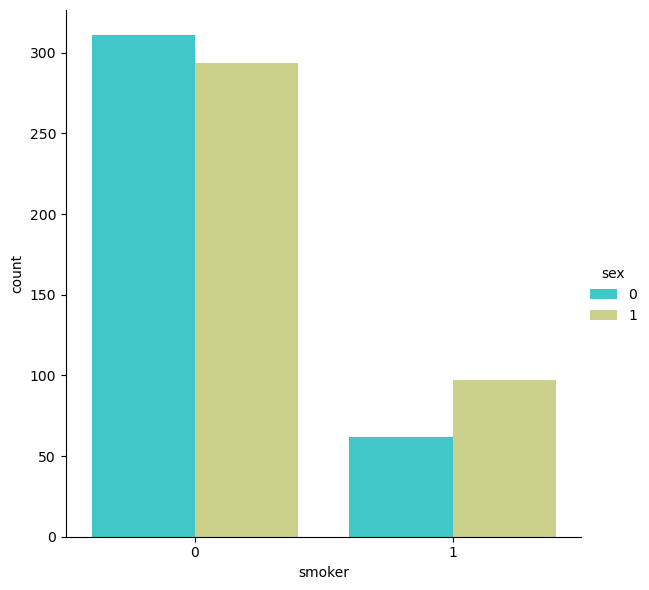

In [30]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], height = 6)
ax.set_title('Smokers and non-smokers who have childrens')


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [33]:
# Linear Regression
x = data.drop(['charges'], axis=1)
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
lr = LinearRegression().fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

r2_test_linear = r2_score(y_test, y_test_pred)
n = x_test.shape[0]  # Number of samples
p_linear = x_test.shape[1]  # Number of predictors
adjusted_r2_linear = 1 - (1 - r2_test_linear) * (n - 1) / (n - p_linear - 1)

print("Linear Regression R-squared (Test):", r2_test_linear)
print("Adjusted R-squared (Test) for Linear Regression:", adjusted_r2_linear)

# Calculate Mean Squared Error for Linear Regression
mse_test_linear = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (Test) for Linear Regression:", mse_test_linear)


Linear Regression R-squared (Test): 0.7962732059725786
Adjusted R-squared (Test) for Linear Regression: 0.7925464963257355
Mean Squared Error (Test) for Linear Regression: 32073628.560109206


In [34]:
# Polynomial Regression
X = data.drop(['charges', 'region'], axis=1)
Y = data.charges

quad = PolynomialFeatures(degree=2)
x_quad = quad.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(x_quad, Y, random_state=0)

plr = LinearRegression().fit(X_train, Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

r2_test_poly = r2_score(Y_test, Y_test_pred)
n = X_test.shape[0]  # Number of samples
p_poly = X_test.shape[1]  # Number of predictors
adjusted_r2_poly = 1 - (1 - r2_test_poly) * (n - 1) / (n - p_poly - 1)

print("Polynomial Regression R-squared (Test):", r2_test_poly)
print("Adjusted R-squared (Test) for Polynomial Regression:", adjusted_r2_poly)

# Calculate Mean Squared Error for Polynomial Regression
mse_test_poly = mean_squared_error(Y_test, Y_test_pred)
print("Mean Squared Error (Test) for Polynomial Regression:", mse_test_poly)


Polynomial Regression R-squared (Test): 0.8849197344147227
Adjusted R-squared (Test) for Polynomial Regression: 0.877198694231685
Mean Squared Error (Test) for Polynomial Regression: 18117605.54423731


In [35]:
forest = RandomForestRegressor(n_estimators=100, random_state=1, n_jobs=-1)
forest.fit(x_train, y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

mse_train = mean_squared_error(y_train, forest_train_pred)
mse_test = mean_squared_error(y_test, forest_test_pred)
r2_train = r2_score(y_train, forest_train_pred)
r2_test = r2_score(y_test, forest_test_pred)

n = len(y_test)
p = x_test.shape[1]  # Number of features

# Calculate Adjusted R-squared for Random Forest Regression
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)

print('MSE train data:', mse_train)
print('MSE test data:', mse_test)
print('Adjusted R2 train data:', adjusted_r2_train)
print('Adjusted R2 test data:', adjusted_r2_test)
print('R2 train data:', r2_train)
print('R2 test data:', r2_test)



MSE train data: 3746684.4342480116
MSE test data: 19965476.410634134
Adjusted R2 train data: 0.9733001627063802
Adjusted R2 test data: 0.8708625054334099
R2 train data: 0.973779800502074
R2 test data: 0.8731823406651451
